## Multiple Variale Linear Regression

In [1]:
import numpy as np
import copy, math
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2)

In [2]:
def load_dataset():
    data = np.loadtxt("data/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    Y = data[:,4]
    return X,Y

In [3]:
x_train, y_train = load_dataset()
features = ['size(sqft)','bedrooms','floors','age']

In [4]:
print(x_train.shape)

(99, 4)


In [5]:
print(y_train.shape)

(99,)


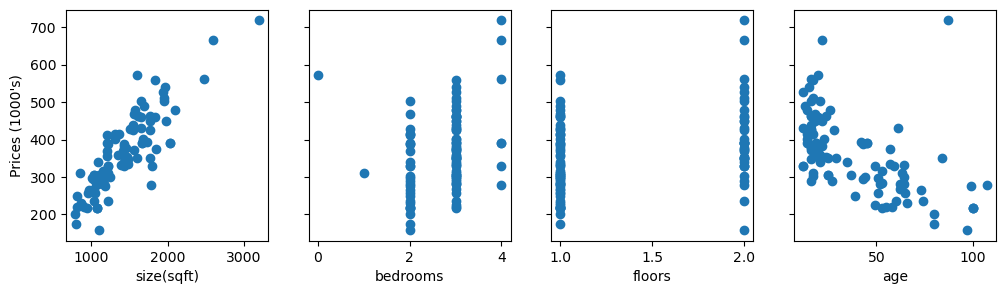

In [6]:
# Plot features vs Price
fig,ax=plt.subplots(1,4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i], y_train)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Prices (1000's)")
plt.show()

In [7]:
#Method to compute cost
def cost_function(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b
        cost += (f_wb_i - y[i])**2
    return cost/(2*m)

In [8]:
# Calculate gradient of 1 batch
def compute_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


In [9]:
# Gradient descent to minimize cost function
def gradient_descent(x, y, w_init, b_init, alpha, itrs):
    j_track = []
    w = copy.deepcopy(w_init)
    b = b_init
    for i in range(itrs):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i<100000:
            j_track.append(cost_function(x, y, w, b))

        if i%math.ceil(itrs / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_track[-1]:8.2f}  ")
    return w, b, j_track

In [10]:
# Method for feature scaling
def zscore_normalization(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    x_normalized = (x - mu) / sigma
    return (x_normalized, mu, sigma)

In [11]:
x_noramlized, x_mu, x_sigma = zscore_normalization(x_train)
print(f"x_mu: {x_mu} ::: x_sigma: {x_sigma}")

x_mu: [1.42e+03 2.72e+00 1.38e+00 3.84e+01] ::: x_sigma: [411.62   0.65   0.49  25.78]


In [12]:
w_init = np.zeros(x_train.shape[1])
b_init = 0
w_norm,b_norm,_ = gradient_descent(x_noramlized, y_train, w_init, b_init, 0.01, 1000)
print(f"w_norm: {w_norm}")
print(f"b_norm: {b_norm}")

Iteration    0: Cost 69923.73  
Iteration  100: Cost  9974.03  
Iteration  200: Cost  1877.01  
Iteration  300: Cost   621.39  
Iteration  400: Cost   364.86  
Iteration  500: Cost   285.55  
Iteration  600: Cost   252.02  
Iteration  700: Cost   235.83  
Iteration  800: Cost   227.69  
Iteration  900: Cost   223.54  
w_norm: [107.68 -19.84 -31.07 -38.52]
b_norm: 363.1404029070674


In [13]:
def predict(x, x_mu, x_sigma):
    x_norm = (x - x_mu) / x_sigma
    prediction = np.dot(x_norm, w_norm) + b_norm
    return prediction * 1000

In [14]:
x_house = np.array([1200, 3, 1, 40])
price = predict(x_house, x_mu, x_sigma)
print(f"Predicted price of house is :  {price:0.0f}")

Predicted price of house is :  319510
